# Basic EO Operations

In [1]:
import os
os.environ['HTTP_PROXY']=""
os.environ['HTTPS_PROXY']=""

## RGB True color composite

In [ ]:
filename = r"F:\Proyectos\2018\Naturgy_Tala_poda\Viveiro\1030050034F8C100_clip.tif"

with rio.open(filename) as src:
    bands = src.read()
    rgb = np.stack((rio.plot.adjust_band(bands[0]),rio.plot.adjust_band(bands[1]),rio.plot.adjust_band(bands[2])))
    fig, (axr, axg) = plt.subplots(figsize=(12, 10))
    #rgb=rio.plot.reshape_as_image(rgb)
    #plt.imshow(rgb)
    show(rgb, ax=axr)
    plt.show()

## Clip raster

## Reshaped image
Rasterio reshaped into the order expected by image processing and visualization software (matplotlib, scikit-image, etc) by swapping the axes order from (bands, rows, columns) to (rows, columns, bands)
rasterio.plot.reshape_as_image
rasterio.plot.reshape_as_raster

## Normalize
Normalize bands into 0.0 - 1.0 scale

In [ ]:
file = r"F:\Proyectos\2018\Naturgy_Tala_poda\Viveiro\"
fileraster = r"F:\Proyectos\2018\Naturgy_Tala_poda\Viveiro\1030050034F8C100_chip_clip2.tif"

# Normalize bands into 0.0 - 1.0 scale
def normalize(array):
    array_min, array_max = array.min(), array.max()
    return (array - array_min) / (array_max - array_min)

with rio.open(filename) as src:
    bands = src.read()
    rgb = np.stack((rio.plot.adjust_band(bands[0]),rio.plot.adjust_band(bands[1]),rio.plot.adjust_band(bands[2])))
    #rgb = np.stack((bands[0], bands[1], bands[2]))
    #ndvi = (nir - red) / (nir + red)
    fig, ax = plt.subplots(figsize=(12, 10))
    #rgb=rio.plot.reshape_as_image(rgb)
    #plt.imshow(rgb)
    show(rgb, ax=ax) #normalize=(True|'linear'|'log')
    plt.show()

## Troceado de una imagen

In [11]:
import os
import rasterio as rio
from rasterio import windows
from rasterio.plot import show
from rasterio.features import geometry_mask, rasterize
import glob
from itertools import product
from matplotlib import pyplot

In [9]:
def tiles_image(raster, width, height):
    nols, nrows = raster.meta['width'], raster.meta['height']
    offsets = product(range(0, nols, width), range(0, nrows, height))
    big_window = windows.Window(col_off=0, row_off=0, width=nols, height=nrows)
    for col_off, row_off in  offsets:
        window =windows.Window(col_off=col_off, row_off=row_off, width=width, height=height).intersection(big_window)
        transform = windows.transform(window, raster.transform)
        yield window, transform

Landsat on Google:


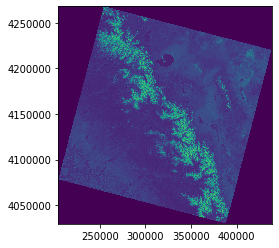

In [12]:
print('Landsat on Google:')
filepath = 'https://storage.googleapis.com/gcp-public-data-landsat/LC08/01/042/034/LC08_L1TP_042034_20170616_20170629_01_T1/LC08_L1TP_042034_20170616_20170629_01_T1_B4.TIF'
with rio.open(filepath) as src:
    show(src)

In [13]:
out_path = r"..//data//EOAnalytics//Tiles"
tif_ext="*.tif"
output_filename = 'Tile{}.tif'
tile_width, tile_height = 2000, 2000

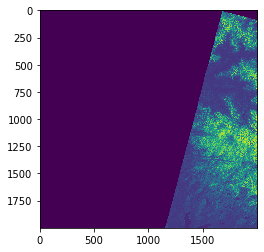

Window(col_off=0, row_off=0, width=2000, height=2000)
BoundingBox(left=204285.0, bottom=4208115.0, right=264285.0, top=4268115.0)
EPSG:32611
File..//data//EOAnalytics//Tiles\Tile0.tif created


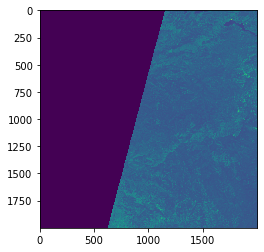

Window(col_off=0, row_off=2000, width=2000, height=2000)
BoundingBox(left=204285.0, bottom=4148115.0, right=264285.0, top=4208115.0)
EPSG:32611
File..//data//EOAnalytics//Tiles\Tile1.tif created


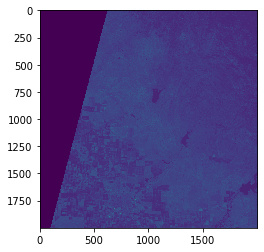

Window(col_off=0, row_off=4000, width=2000, height=2000)
BoundingBox(left=204285.0, bottom=4088115.0, right=264285.0, top=4148115.0)
EPSG:32611
File..//data//EOAnalytics//Tiles\Tile2.tif created


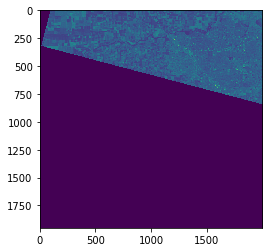

Window(col_off=0, row_off=6000, width=2000, height=1951)
BoundingBox(left=204285.0, bottom=4029585.0, right=264285.0, top=4088115.0)
EPSG:32611
File..//data//EOAnalytics//Tiles\Tile3.tif created


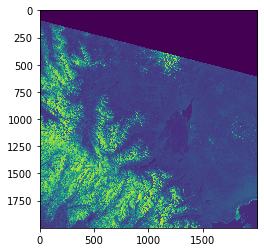

Window(col_off=2000, row_off=0, width=2000, height=2000)
BoundingBox(left=264285.0, bottom=4208115.0, right=324285.0, top=4268115.0)
EPSG:32611
File..//data//EOAnalytics//Tiles\Tile4.tif created


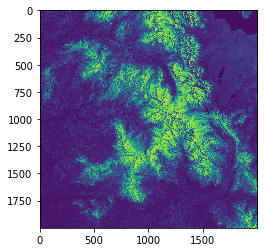

Window(col_off=2000, row_off=2000, width=2000, height=2000)
BoundingBox(left=264285.0, bottom=4148115.0, right=324285.0, top=4208115.0)
EPSG:32611
File..//data//EOAnalytics//Tiles\Tile5.tif created


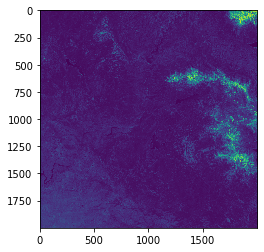

Window(col_off=2000, row_off=4000, width=2000, height=2000)
BoundingBox(left=264285.0, bottom=4088115.0, right=324285.0, top=4148115.0)
EPSG:32611
File..//data//EOAnalytics//Tiles\Tile6.tif created


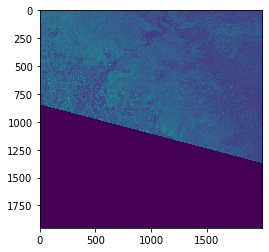

Window(col_off=2000, row_off=6000, width=2000, height=1951)
BoundingBox(left=264285.0, bottom=4029585.0, right=324285.0, top=4088115.0)
EPSG:32611
File..//data//EOAnalytics//Tiles\Tile7.tif created


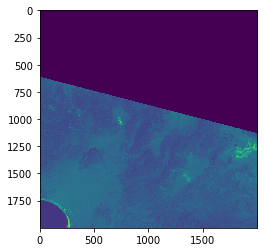

Window(col_off=4000, row_off=0, width=2000, height=2000)
BoundingBox(left=324285.0, bottom=4208115.0, right=384285.0, top=4268115.0)
EPSG:32611
File..//data//EOAnalytics//Tiles\Tile8.tif created


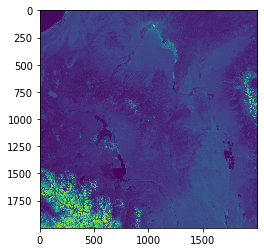

Window(col_off=4000, row_off=2000, width=2000, height=2000)
BoundingBox(left=324285.0, bottom=4148115.0, right=384285.0, top=4208115.0)
EPSG:32611
File..//data//EOAnalytics//Tiles\Tile9.tif created


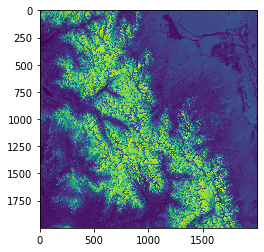

Window(col_off=4000, row_off=4000, width=2000, height=2000)
BoundingBox(left=324285.0, bottom=4088115.0, right=384285.0, top=4148115.0)
EPSG:32611
File..//data//EOAnalytics//Tiles\Tile10.tif created


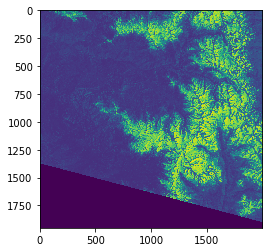

Window(col_off=4000, row_off=6000, width=2000, height=1951)
BoundingBox(left=324285.0, bottom=4029585.0, right=384285.0, top=4088115.0)
EPSG:32611
File..//data//EOAnalytics//Tiles\Tile11.tif created


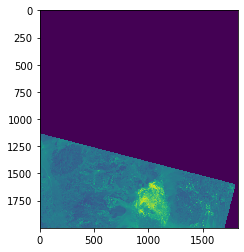

Window(col_off=6000, row_off=0, width=1821, height=2000)
BoundingBox(left=384285.0, bottom=4208115.0, right=438915.0, top=4268115.0)
EPSG:32611
File..//data//EOAnalytics//Tiles\Tile12.tif created


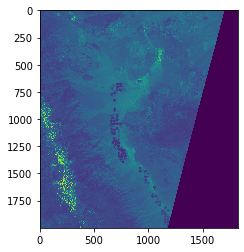

Window(col_off=6000, row_off=2000, width=1821, height=2000)
BoundingBox(left=384285.0, bottom=4148115.0, right=438915.0, top=4208115.0)
EPSG:32611
File..//data//EOAnalytics//Tiles\Tile13.tif created


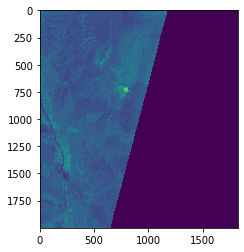

Window(col_off=6000, row_off=4000, width=1821, height=2000)
BoundingBox(left=384285.0, bottom=4088115.0, right=438915.0, top=4148115.0)
EPSG:32611
File..//data//EOAnalytics//Tiles\Tile14.tif created


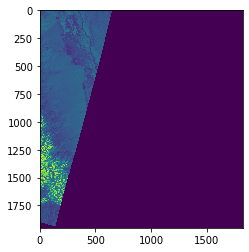

Window(col_off=6000, row_off=6000, width=1821, height=1951)
BoundingBox(left=384285.0, bottom=4029585.0, right=438915.0, top=4088115.0)
EPSG:32611
File..//data//EOAnalytics//Tiles\Tile15.tif created


In [15]:
if not os.path.exists(out_path):
    os.makedirs(out_path)

flag=0
with rio.open(filepath) as img:
    meta = img.meta.copy()
    for window, transform in tiles_image(img, tile_width, tile_height):        
        show(img.read(window=window))
        print(window)
        ## Si queremos guardar las imágenes descomentar las siguentes lineas
        #meta['transform'] = transform
        #meta['width'], meta['height'] = window.width, window.height
        #outfile = os.path.join(out_path,output_filename.format(int(flag)))
        #with rio.open(outfile, 'w', **meta) as tile:
        #    print(tile.bounds)
        #    print(tile.crs)
        #    tile.write(img.read(window=window))    
        #print('File'+outfile+' created')
        #flag=flag+1